In [1]:
%pip install import_ipynb
import import_ipynb

from PAc_optimal_bounds import *

Note: you may need to restart the kernel to use updated packages.


In [13]:
import sys, os

def get_env_type() -> str:
    '''
    Get the environment type where the code is running.

    Returns:
    - 'kaggle' if running on Kaggle
    - 'google.colab' if running on Google Colab
    - 'local' if running on local environment
    '''
    if 'KAGGLE_KERNEL_RUN_TYPE' in os.environ:
        return 'kaggle'
    elif 'google.colab' in sys.modules:
        if 'COLAB_TPU_ADDR' in os.environ:  # Google Colab w/ TPU
            # Connect to TPU
            import tensorflow
            tpu = tensorflow.distribute.cluster_resolver.TPUClusterResolver()
            tensorflow.config.experimental_connect_to_cluster(tpu)
            tensorflow.tpu.experimental.initialize_tpu_system(tpu)
        # Connect to Drive
        from google.colab import drive
        drive.mount('/content/drive')

        # load the custom PAc Optimal Bounds module
        %cd "/content/drive/MyDrive/Colab Notebooks/PAc"
        from PAc_optimal_bounds import print_versions_and_GPU, PAc_Approximator, log, get_vars_info, PSOEngine2D, multi_opt_runner

        return 'google.colab'
    else:   # Running on local environment

        # load the custom PAc Optimal Bounds module
        %cd "C:/Users/igorv/OneDrive/DL/PAc"

        from PAc_optimal_bounds import print_versions_and_GPU, PAc_Approximator, log, get_vars_info, PSOEngine2D, multi_opt_runner

        return 'local'


In [21]:
print_versions_and_GPU()

match get_env_type():
    case 'kaggle':
        raise ValueError('This notebook is not designed to run on Kaggle.')
    case 'google.colab':
        data_path = '/content/drive/MyDrive/data/PAc/bounds/'
    case 'local':
        data_path = "C:/Users/igorv/OneDrive/DL/PAc/"
    case _:
        raise ValueError(f'Unknown environment type: {get_env_type()}')

print(f'Running on {get_env_type()}')

Python: 3.11.5
TensorFlow: 2.16.1
Keras: 3.1.1
Scikit-learn: 1.2.2
C:\Users\igorv\OneDrive\DL\PAc
C:\Users\igorv\OneDrive\DL\PAc
Running on local


In [23]:
import tensorflow as tf

approx_silu = PAc_Approximator(
    func=lambda x: tf.nn.silu(x).numpy(),
    func_low=lambda x: 0,
    func_high=lambda x: x)


In [24]:
for sz in [16, 32, 64, 128, 256, 512, 1024, 2048, 4096]:
    multi_opt_runner(data_path, f'silu_{sz}', approx_silu.approx_swarm_errors, n=sz, num_runs=5, max_iter=1000, sig_digits=4, patience=30)

2024-06-01 03:36:48.134512 silu_16 loaded (5)
2024-06-01 03:36:48.140975 silu_32 loaded (5)
2024-06-01 03:36:48.150391 silu_64 loaded (5)
2024-06-01 03:36:48.150391 silu_128 loaded (5)
2024-06-01 03:36:48.163551 silu_256 loaded (5)
2024-06-01 03:36:48.169576 silu_512 loaded (5)
2024-06-01 03:36:48.176585 silu_1024 loaded (5)
2024-06-01 03:36:48.182766 silu_2048 loaded (5)
2024-06-01 03:36:48.189365 silu_4096 loaded (5)


In [25]:
engine = PSOEngine2D()
engine.optimize(approx_silu.approx_swarm_errors, max_iter=1000, sig_digits=5, patience=50, n=256)

2024-06-01 03:36:55.036044 Starting optimization 1000 1.49385e-02 9.97672e-03 7.06390e-03 5.40945e-03 5.23985e-03 5.13220e-03 5.11095e-03 ...5.10124e-03 5.02491e-03 4.98718e-03 4.55114e-03 .4.41669e-03 ..4.35471e-03 ............4.32250e-03 4.30818e-03 .......4.29416e-03 ..............4.28764e-03 .4.28600e-03 ..4.28192e-03 .4.28084e-03 ...4.25260e-03 ................................................. - Early stopping: 0.0042526004944254524 @ [-5.48156542  5.46418851]


0.0042526004944254524

<Axes: title={'center': 'Cost History'}, xlabel='Iterations', ylabel='Cost'>

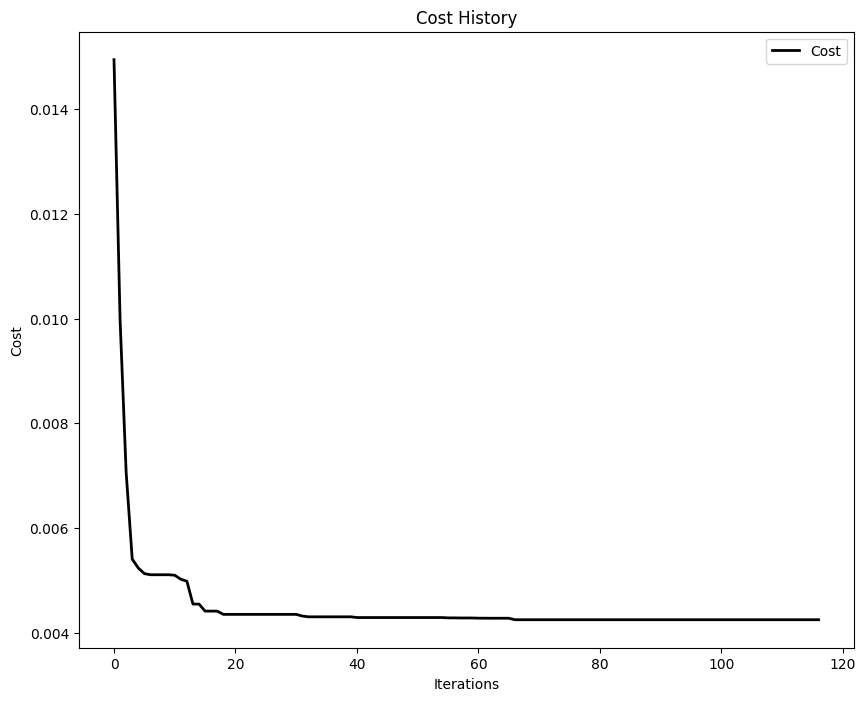

In [26]:
from pyswarms.utils.plotters import plot_cost_history, plot_contour, plot_surface
import matplotlib.pyplot as plt

plot_cost_history(cost_history=engine.optimizer.cost_history)

In [27]:
best_x_min, best_x_max = engine.best_pos[0], engine.best_pos[1]


In [29]:
plot_silu_256_10_10 = Error3D(data_path, "silu_256_10_10", "PAc-SiLU (256)", best_x_min, best_x_max, approx_silu, 256, -10., 0., 0., 10., 50)

2024-06-01 03:40:55.675730 Data Loaded


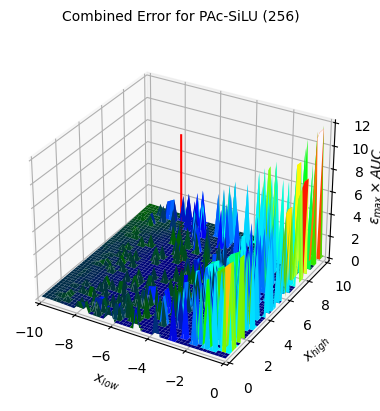

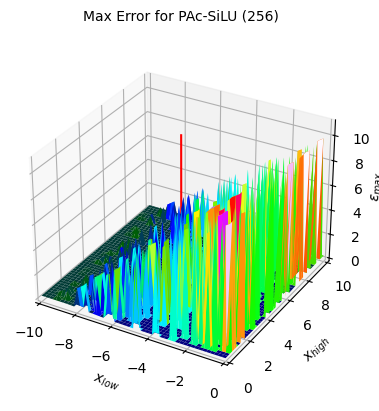

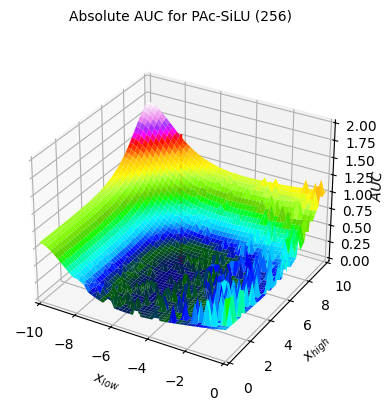

In [30]:
plot_silu_256_10_10.plot_combined_error()
plot_silu_256_10_10.plot_max_error()
plot_silu_256_10_10.plot_auc()

In [31]:
plot_silu_256_2_2 = Error3D(data_path, "silu_256_2_2", "PAc-SiLU (256)", best_x_min, best_x_max, approx_silu, 256, -6.5, -4.5, 4.5, 6.5, 50)

2024-06-01 03:41:02.462121 Data Loaded


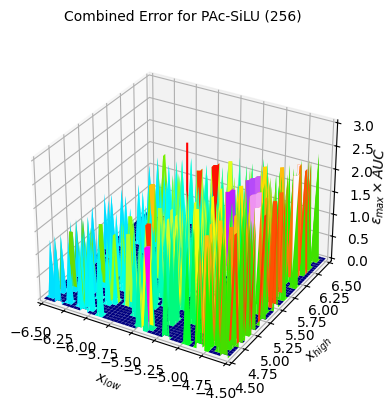

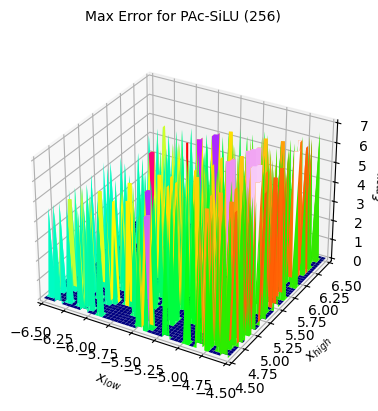

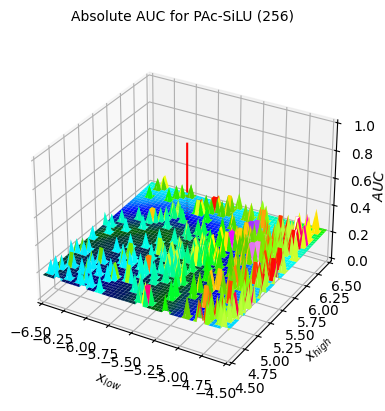

In [32]:
plot_silu_256_2_2.plot_combined_error()
plot_silu_256_2_2.plot_max_error()
plot_silu_256_2_2.plot_auc()

In [33]:
plot_silu_256_05_05 = Error3D(data_path, "silu_256_05_05", "PAc-SiLU (256)", best_x_min, best_x_max, approx_silu, 256, -5.75, -5.25, 5.25, 5.75, 50)

2024-06-01 03:41:08.845026 Data Loaded


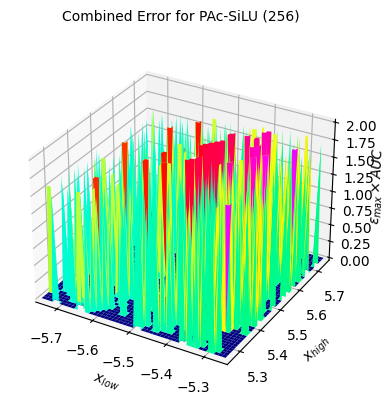

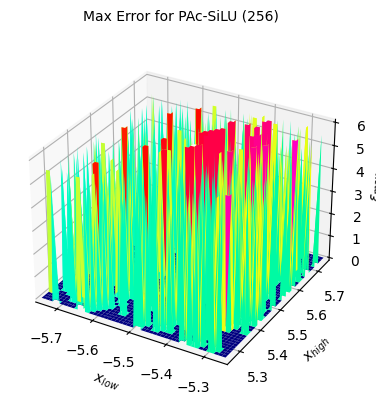

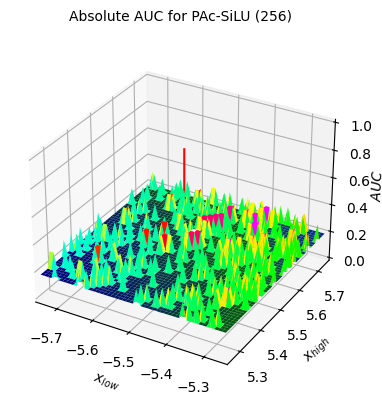

In [34]:
plot_silu_256_05_05.plot_combined_error()
plot_silu_256_05_05.plot_max_error()
plot_silu_256_05_05.plot_auc()